In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import ast #conversion of strings to python objects
from collections import Counter #count a number of occurences of items in a list

In [2]:
### Importing the data set ###
df=pd.read_csv('restaurants_zlatestranky.csv',index_col=0)

In [5]:
#It appears that we have some non-unique values in our data set
non_unique=[]
for i in df['name']:
    if sum(df['name']==i)>1:
        non_unique.append(i)
    else:
        pass
print(f'{len(set(non_unique))} duplicates') #We have 78 duplicates
print(f'{len(df.loc[df["name"].isin(non_unique),:])} duplicate rows in total') #Which makes 192 rows total
#We cannot use the name column as an index

78 duplicates
192 duplicate rows in total


In [6]:
df[df['name'].isin(non_unique)]

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
52,AP TRUST a.s.,Praha 1,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 222 311 221'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.089204, 'longitude': 14.428594}"
53,AP TRUST a.s.,Praha 1,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 378 121 301'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.086917, 'longitude': 14.433777}"
87,Balbínova poetická spol. s r.o.,Praha,100.0,1,NaN,NaN,NaN,{'hlavní telefon': '+420 222 363 205'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.077236, 'longitude': 14.433388}"
89,Balbínova poetická spol. s r.o.,Praha,0.0,0,NaN,NaN,NaN,"{'hlavní telefon': '+420 226 804 980', 'další ...",NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.081603, 'longitude': 14.422662}"
92,BANYAN - čajovna Praha Vinohrady,Praha 2,0.0,0,"{'Po': '14 - 23:59', 'Út': '14 - 23:59', 'St':...","{'Po': 9.98, 'Út': 9.98, 'St': 9.98, 'Čt': 9.9...",NaN,{'hlavní telefon': '+420 722 779 133'},http://www.cajovnabanyan.cz,['hotově'],NaN,NaN,NaN,"{'latitude': 50.0722723, 'longitude': 14.4404889}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,Restaurace Globus,Praha,0.0,0,"{'Po': '7 - 21', 'Út': '7 - 21', 'St': '7 - 21...","{'Po': 14.0, 'Út': 14.0, 'St': 14.0, 'Čt': 14....",NaN,{'Main': '+420 800 241 242'},https://www.globus.cz/praha-zlicin/nabidka/res...,"['American Express', 'hotově', 'DINERSCLUB', '...","['Vegetariánská jídla', 'Bezlepková jídla', 'V...","['Restaurace', 'Každý den čerstvé', 'Týdenní m...",NaN,"{'latitude': 50.05293655395508, 'longitude': 1..."
2164,Restaurace Globus,Praha,0.0,0,"{'Po': '7 - 21', 'Út': '7 - 21', 'St': '7 - 21...","{'Po': 14.0, 'Út': 14.0, 'St': 14.0, 'Čt': 14....",NaN,{'Main': '+420 800 241 242'},https://www.globus.cz/praha-cakovice/nabidka/r...,"['American Express', 'hotově', 'DINERSCLUB', '...","['Vegetariánská jídla', 'Bezlepková jídla', 'V...","['Restaurace', 'Každý den čerstvé', 'Týdenní m...",NaN,"{'latitude': 50.15133285522461, 'longitude': 1..."
2183,Subway,Praha,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 739 767 952'},https://restaurants.subway.com/cs/cesko/prague...,NaN,NaN,NaN,NaN,"{'latitude': 50.0848274230957, 'longitude': 14..."
2184,Subway,Praha,0.0,0,NaN,NaN,NaN,{'Main': '+420 775 402 976'},https://restaurants.subway.com/cs/ceska-republ...,NaN,NaN,NaN,NaN,"{'latitude': 50.026466369628906, 'longitude': ..."


In [3]:
#The dictionaries and lists in our data frame became strings after we converted the data frame to csv => we need to convert them back
for column in ['opening_hours','opening_hours_span','phones','payment_methods','products','services','marks','coordinates']:
    for idx in df.index:
        try:
            df.at[idx,column]=ast.literal_eval(df.at[idx,column])  
        except ValueError:
            pass #In case there is NaN, ast.literal_eval throws an error => we will pass since we do not need to convert NaNs anyway

In [8]:
df.head()

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
0,Repre restaurant,Praha 1,0.0,0,"{'Po': '10:30 - 23', 'Út': '10:30 - 23', 'St':...","{'Po': 12.5, 'Út': 12.5, 'St': 12.5, 'Čt': 12....",rezervace@repre-restaurant.cz,{'Restaurace Praha 1': '+420 222 211 451'},http://www.repre-restaurant.cz,"[faktura, hotově, VISA, MASTERCARD, CHEQUEDEJE...",[taneční parket],"[česká kuchyně, mezinárodní kuchyně, nekuřácký...","[salónek, klimatizace, bezbariérový přístup]","{'latitude': 50.08553, 'longitude': 14.42718}"
1,Restaurace Nad Ledem,Praha 10,100.0,1,"{'Po': '10 - 23', 'Út': '10 - 23', 'St': '10 -...","{'Po': 13.0, 'Út': 13.0, 'St': 13.0, 'Čt': 13....",nadledem@seznam.cz,{'Restaurace Praha 10': '+420 728 464 824'},https://restauracenadledem.cz/,"[hotově, faktura, MASTERCARD, VISA]","[Denní menu, Pivo z tanku, Točené limonády, Ne...","[Restaurace, Bezbariérový vstup, Letní zahrádk...","[Kofola, Birell, Pilsner Urquell]","{'latitude': 50.068558, 'longitude': 14.4777165}"
2,SRI LANKAN CURRY HOUSE,Praha 3,100.0,1,"{'Po': '11 - 22', 'Út': '11 - 22', 'St': '11 -...","{'Po': 11.0, 'Út': 11.0, 'St': 11.0, 'Čt': 11....",srilankancurryhouse@gmail.com,{'hlavní telefon': '+420 603 118 707'},https://srilankanrestaurant.cz/,"[hotově, faktura, VISA, MASTERCARD]","[polévky, předkrmy, zeleninové kari, pikantní ...",[restaurace],NaN,"{'latitude': 50.07646, 'longitude': 14.44919}"
3,Restaurace HOOTERS Vodičkova,Praha 2,0.0,0,"{'Po': '11 - 23', 'Út': '11 - 23', 'St': '11 -...","{'Po': 12.0, 'Út': 12.0, 'St': 12.0, 'Čt': 12....",vodickova@hooters.cz,{'Rezervace': '+420 602 799 222'},http://hooters.cz/cz/vodickova?utm_source=Mext...,"[American Express, VISA, hotově, faktura, SODE...","[předkrmy, polévky, quesadillas, burgery, příl...","[restaurace, sportovní přenosy, rozlučky se sv...","[HOOTERS, Pilsner Urquell, Coca Cola]","{'latitude': 50.078701, 'longitude': 14.421425}"
4,1. MEXICKÁ RESTAURACE,Praha 1,89.0,2,"{'Po': '11:30 - 23:59', 'Út': '11:30 - 23:59',...","{'Po': 12.48, 'Út': 12.48, 'St': 12.48, 'Čt': ...",NaN,{'hlavní telefon': '+420 257 317 173'},NaN,[hotově],NaN,NaN,NaN,"{'latitude': 50.08294, 'longitude': 14.40461}"


In [29]:
df[pd.isna(df.coordinates)] #Only one single restaurant does not have coordinates 

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
745,Céleste,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#It is closed => we will drop it
try:
    ind=list(pd.isna(df.coordinates)).index(True) #index to be dropped
    df.drop(ind,inplace=True)
except IndexError:
    print('The value has been already removed')

In [31]:
district_counts=df.district.value_counts() #Currently administrative district => maybe should aggregate to municipal districts
district_counts

Praha 1     648
Praha       252
Praha 2     214
Praha 5     149
Praha 3     129
Praha 4     125
Praha 6     123
Praha 8     112
Praha 10    105
Praha 7      94
Praha 9      50
Praha 11     37
Praha 13     24
Praha 12     18
Praha 14     16
Praha 17     15
Praha 18     14
Praha 16     13
Praha 22     13
Praha 15     13
Praha 19     11
Praha 20      8
Praha 21      7
Praha 31      1
Name: district, dtype: int64

In [32]:
#Inspecting suspicious Prague 31
df[df.district=='Praha 31']

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
1804,Starbucks coffee,Praha 31,0.0,0,"{'Po': '9 - 21', 'Út': '9 - 21', 'St': '9 - 21...","{'Po': 12.0, 'Út': 12.0, 'St': 12.0, 'Čt': 12....",NaN,{'hlavní telefon': '+420 235 013 311'},http://starbuckscoffee.cz,"[hotově, VISA, MASTERCARD, American Express, D...","[Káva, čaj, nápoje, jídlo]",[Restaurace],NaN,"{'latitude': 50.092522, 'longitude': 14.399834}"


In [33]:
#There is a "Praha 310" at the beginning of the address => need to resolve in Restaurant.py
#https://www.zlatestranky.cz/profil/H1799130
'Praha 310, 118 00 Praha 1-Hradčany'
#For now we can just change it to Praha 1
df.district.replace('Praha 31','Praha 1',inplace=True)


In [34]:
#inspecting 'Praha' without a number
df[df.district=='Praha']
#Slivenec = Praha 5
#Zbraslav = Praha 16
#Some addresses do not contain the district e.g. Karla Engliše 3211 (Praha 5)
#Troja = Praha 7
#Smíchov = Praha 5
#Uhříněves = Praha 22

#May want to try to convert the address with Praha only to appropriate municipal districts


,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
23,Aleš Tománek,Praha,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 257 921 449'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 49.966218, 'longitude': 14.380475}"
29,Alois Filip,Praha,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 222 522 054'},http://www.merlin-pub.cz,NaN,NaN,NaN,NaN,"{'latitude': 50.016315, 'longitude': 14.354978}"
43,ANDĚL CITY,Praha,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 602 568 021'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.06998, 'longitude': 14.402194}"
57,ARENA RESTAURACE,Praha,0.0,0,NaN,NaN,catering@trojacatering.cz,{'hlavní telefon': '+420 603 107 964'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.116847, 'longitude': 14.411346}"
71,ASTON Café Restaurant,Praha,0.0,0,NaN,NaN,rezervace@aston-cafe.cz,{'hlavní telefon': '+420 722 643 760'},http://www.aston-cafe.cz,NaN,NaN,NaN,NaN,"{'latitude': 50.0741598, 'longitude': 14.406274}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,Subway,Praha,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 739 767 952'},https://restaurants.subway.com/cs/cesko/prague...,NaN,NaN,NaN,NaN,"{'latitude': 50.0848274230957, 'longitude': 14..."
2184,Subway,Praha,0.0,0,NaN,NaN,NaN,{'Main': '+420 775 402 976'},https://restaurants.subway.com/cs/ceska-republ...,NaN,NaN,NaN,NaN,"{'latitude': 50.026466369628906, 'longitude': ..."
2185,Subway,Praha,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 604 777 595'},https://restaurants.subway.com/cs/ceska-republ...,NaN,NaN,NaN,NaN,"{'latitude': 50.08316421508789, 'longitude': 1..."
2186,Svatby Nebozízek,Praha,0.0,0,NaN,NaN,NaN,{'Main': '+420 602 312 582'},http://www.nebozizek.cz/,NaN,NaN,NaN,NaN,"{'latitude': 50.08199691772461, 'longitude': 1..."


In [5]:
#Aggregation to municipal districts
df.district.replace(['Praha 11','Praha 12'],'Praha 4',inplace=True)
df.district.replace(['Praha 13','Praha 16','Praha 17'],'Praha 5',inplace=True)
df.district.replace(['Praha 14','Praha 18','Praha 19','Praha 20','Praha 21'],'Praha 9',inplace=True)
df.district.replace(['Praha 15','Praha 22'],'Praha 10',inplace=True)

In [36]:
#Number of restaurants in each district
district_counts=df.district.value_counts()
district_counts.pop('Praha') #Address without a district
district_counts

Praha 1     649
Praha 2     214
Praha 5     201
Praha 4     180
Praha 10    131
Praha 3     129
Praha 6     123
Praha 8     112
Praha 9     106
Praha 7      94
Name: district, dtype: int64

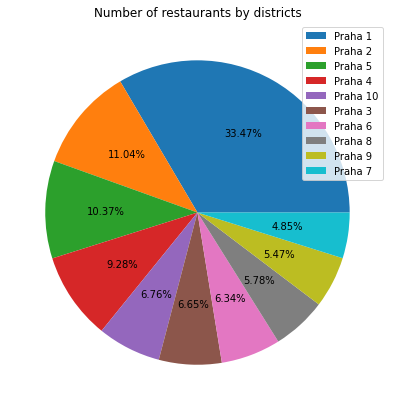

In [65]:
fig_size=plt.figure(figsize=(7,7))
#district_pie=plt.pie(district_counts.values,labels=district_counts.index,labeldistance=None)
#title=plt.title('Number of restaurants by districts')
#legend=plt.legend()
district_counts.plot.pie(labeldistance=None, autopct='%1.2f%%')
plt.title('Number of restaurants by districts')
plt.ylabel('')
plt.legend()

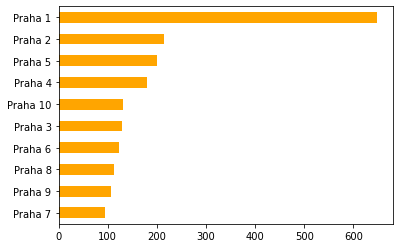

In [67]:
#fig_size=plt.figure(figsize=(8,8))
district_counts.plot.barh(color='orange').invert_yaxis()

In [68]:
#Summing the spans
list_of_sums_of_spans=[]
for dict in df.opening_hours_span:
    if pd.isna(dict):
        value=np.NaN
    else:
        value=sum(filter(None,list(dict.values()))) #we make a list from the dicts values, filter out the None values and sum it
    list_of_sums_of_spans.append(value)

In [69]:
array_of_sums_of_spans=np.array(list_of_sums_of_spans)
print(str(np.sum(array_of_sums_of_spans==max(array_of_sums_of_spans)))+' '+'nonstop restaurants in Prague')
print(str(np.around(np.mean(array_of_sums_of_spans,where=[not i for i in np.isnan(array_of_sums_of_spans)]),2))+' '+'is the mean number of opening hours in a week')
print(str(np.around(np.median(array_of_sums_of_spans[[not i for i in np.isnan(array_of_sums_of_spans)]]),2))+' '+'is the median number of opening hours in a week')
print('Opening hours available for '+str(sum([not i for i in pd.isna(df.opening_hours)]))+' restaurants')
print('Opening hours span available for '+str(sum([not i for i in pd.isna(df.opening_hours_span)]))+' restaurants')
min_span=np.around(np.min(array_of_sums_of_spans[([not i for i in np.isnan(array_of_sums_of_spans)]) & (array_of_sums_of_spans!=0)]),2)
print(f'Lowest opening span ({min_span}): {df.name[array_of_sums_of_spans==min_span].values[0]}')

26 nonstop restaurants in Prague
82.32 is the mean number of opening hours in a week
84.0 is the median number of opening hours in a week
Opening hours available for 881 restaurants
Opening hours span available for 881 restaurants
Lowest opening span (17.5): Momento


In [70]:
df[array_of_sums_of_spans==0] 
#weird opening hours (computed as 0)
#https://www.zlatestranky.cz/profil/H757493
#https://www.zlatestranky.cz/profil/H14470
#https://www.zlatestranky.cz/profil/H2048283
#https://www.zlatestranky.cz/profil/H1433739
#https://www.zlatestranky.cz/profil/H1441575

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
109,Be Bop Lobby Bar,Praha 1,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",bebopbar@radissonblu.com,"{'hlavní telefon': '+420 222 820 420', 'Telefo...",https://www.bebopbar.cz/,[hotově],"[Koktejly a drinky, BeBop Signatures, Be Drive...","[Lobby Bar, Moderní gastronomie, Barmanské akc...","[Royal Oporto, Fonseca Bin, Cinzano Bianco, Gr...","{'latitude': 50.0800654, 'longitude': 14.426618}"
262,ČÍNSKÁ RESTAURACE,Praha 10,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",NaN,{'hlavní telefon': '+420 267 311 492'},NaN,[hotově],"[čínská kuchyně, nápoje]",[restaurace],NaN,"{'latitude': 50.071238, 'longitude': 14.47675}"
405,"Forbidden Taste Prague, s.r.o.",Praha 8,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",popup@forbiddentaste.com,{'hlavní telefon': '+420 732 334 322'},http://forbiddentaste.com,NaN,NaN,"[restaurace, umění, gastronomický zážitek]",NaN,"{'latitude': 50.12404, 'longitude': 14.44935}"
767,Lehká hlava - vegetariánská restaurace,Praha 1,82.0,1,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",info@lehkahlava.cz,{'Main': '+420 222 220 665'},http://www.lehkahlava.cz,"[hotově, faktura, MASTERCARD, VISA]","[Vegetariánská kuchyně, Předkrmy, Polévky, Sal...","[Nekuřácká restaurace, Unikátní interiér, Přát...","[Pilsner Urquell, Bernard, Birell, Cider, Aper...","{'latitude': 50.08409118652344, 'longitude': 1..."
1007,PIVNICE SPARTA,Praha,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",moravec.martin@inmail.cz,{'hlavní telefon': '+420 608 319 611'},http://www.salonek-praha-9.cz,"[TICKETRESTAURANT, hotově]","[firemní rauty, firemní večírky, pořádání svat...",[společesnké akce],"[Gambrinus, Kozel]","{'latitude': 50.106742, 'longitude': 14.562658}"


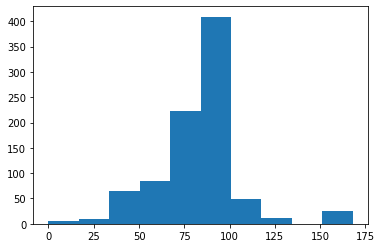

In [71]:
spans_hist=plt.hist(array_of_sums_of_spans)

In [72]:
print('Missing values of review_count: '+str(sum(pd.isna(df.review_count))))
print('Missing values of ratings: '+str(sum(pd.isna(df.ratings))))
print('At least one review: ',str(sum(df.review_count!=0)))
print(f'Highest number of reviews: {max(df.review_count)}')
available_ratings=df.ratings[df.review_count!=0]
print('Mean average of available ratings: '+str(np.around(np.mean(available_ratings),2))+' out of 100')
print('Restaurants with the lowest rating: '+'('+str(min(available_ratings))+') '+", ".join(list(df.name[df.ratings==min(available_ratings)])))
print('Restaurants with the highest rating: '+'('+str(max(available_ratings))+') '+", ".join(list(df.name[df.ratings==max(available_ratings)])))

Missing values of review_count: 0
Missing values of ratings: 0
At least one review:  180
Highest number of reviews: 8
Mean average of available ratings: 82.83 out of 100
Restaurants with the lowest rating: (10.0) Culinary Aroma, RESTAURACE NA JEZERCE, RESTAURACE TERASY, Špejchar - staročeský restaurant
Restaurants with the highest rating: (100.0) Restaurace Nad Ledem, SRI LANKAN CURRY HOUSE, ART&FOOD Had, Balbínova poetická spol. s r.o., CAFE DE PARIS, CAFFEINE s.r.o., ČÍNSKÁ RESTAURACE CHONG FA JIU DIAN, EURO HOT DOG spol. s r.o., Hostinec U Rozcestí, KLUB LÁVKA, Lavande Restaurant, MANU Risto & Lounge, Pinta - pivní steakhouse, Příčný Řez, RESTAURACE CORLEONE, RESTAURACE CHMELNICE, Restaurace K-CLUB, RESTAURACE RETRO KAVÁRNA, Restaurace Selský statek, RESTAURACE TLUSTÁ KOALA, RESTAURACE U BRÁZDŮ, Restaurace U Dědka, Restaurace U Kristiána, Restaurace U Lípy, RESTAURACE U PECKŮ, RESTAURACE U SV. FILIPA A JAKUBA, RESTAURACE U VAZAČŮ, Restaurace Zubajda - Smíchov, Restaurant PEKLO, Rest

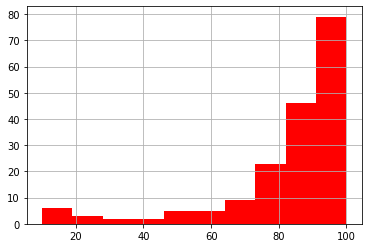

In [73]:
ratings_hist=df.ratings[df.ratings!=0].hist(color='red')

In [74]:
payment_methods=[]
for payment_method in df.payment_methods:
    if type(payment_method)==type([]): #if its a list we need to unpack it
        payment_methods.extend(payment_method)
    elif pd.isna(payment_method): #if it is nan, we do not need it
        pass
    else:
        payment_methods.append(payment_method) #if it is a single value, we append it

In [81]:
payment_methods_counts=Counter(payment_methods)
payment_methods_counts_filtered={key:value for key, value in payment_methods_counts.items() if value>=10} #Filtering out low values

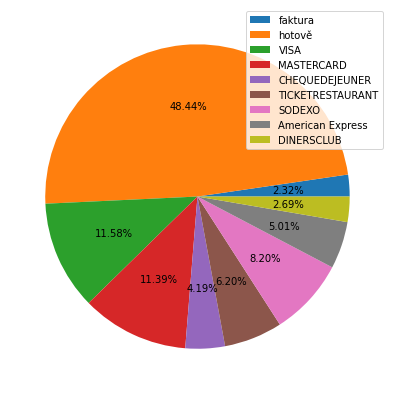

In [84]:
fig_size=plt.figure(figsize=(7,7))
payment_methods_pie=plt.pie(payment_methods_counts_filtered.values(),labels=payment_methods_counts_filtered.keys(),labeldistance=None, autopct='%1.2f%%')
legend=plt.legend()

In [ ]:
items_sorted=sorted(payment_methods_counts_filtered.items(),key=lambda x:x[1]) #sorting the items in the dictionary
payment_methods_counts_filtered_sorted={key:value for key, value in items_sorted} #creating a new dictionary from sorted items

Text(0.5, 1.0, 'Payment methods')

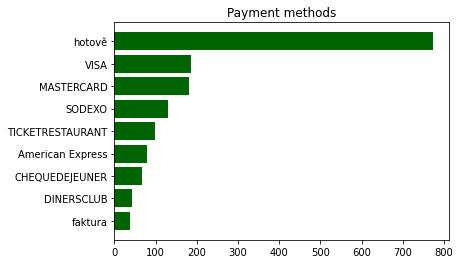

In [120]:
plt.barh(list(payment_methods_counts_filtered_sorted.keys()),payment_methods_counts_filtered_sorted.values(),color='darkgreen') #plotting
plt.title('Payment methods')

In [112]:
pro_ser_mar_dict={}
for column in ['products', 'services', 'marks']:
    demo_list=[]
    for value in df[column]:
        if type(value)==type([]): #if its a list we need to unpack it
            demo_list.extend(value)
        elif pd.isna(value): #if it is nan, we do not need it
            pass
        else:
            demo_list.append(value) #if it is a single value, we append it
    pro_ser_mar_dict[column]=demo_list

In [114]:
pro_ser_mar_counter={key:Counter(value) for key, value in pro_ser_mar_dict.items()}

In [116]:
pro_ser_mar_counter_filtered={}
for item in pro_ser_mar_counter.keys():
    pro_ser_mar_counter_filtered[item]={key:value for key, value in pro_ser_mar_counter[item].items() if value>=10}

In [118]:
pro_ser_mar_counter_filtered_sorted={}
for item in pro_ser_mar_counter_filtered.keys():
    items_sorted=sorted(pro_ser_mar_counter_filtered[item].items(),key=lambda x:x[1]) #sorting the items in the dictionary
    pro_ser_mar_counter_filtered_sorted[item]={key:value for key, value in items_sorted} #creating a new dictionary from sorted items


Text(0.5, 1.0, 'Products')

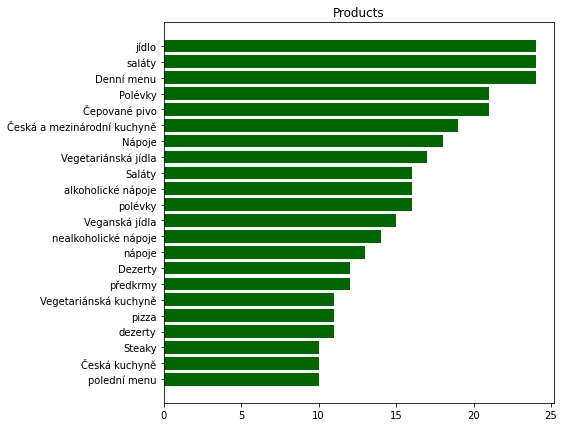

In [123]:
plt.figure(figsize=(7,7))
plt.barh(list(pro_ser_mar_counter_filtered_sorted['products'].keys()),pro_ser_mar_counter_filtered_sorted['products'].values(),color='darkgreen') #plotting
plt.title('Products')

Text(0.5, 1.0, 'Services')

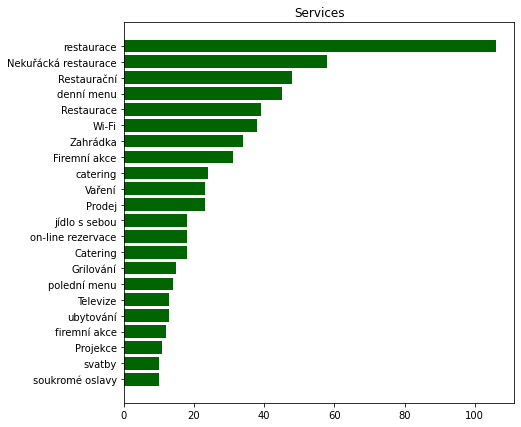

In [124]:
plt.figure(figsize=(7,7))
plt.barh(list(pro_ser_mar_counter_filtered_sorted['services'].keys()),pro_ser_mar_counter_filtered_sorted['services'].values(),color='darkgreen') #plotting
plt.title('Services')

Text(0.5, 1.0, 'Marks')

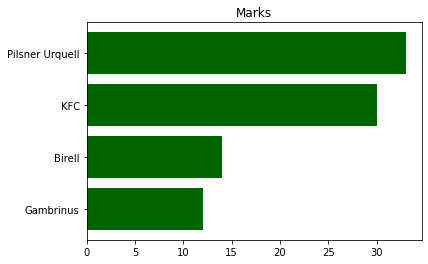

In [126]:
#plt.figure(figsize=(7,7))
plt.barh(list(pro_ser_mar_counter_filtered_sorted['marks'].keys()),pro_ser_mar_counter_filtered_sorted['marks'].values(),color='darkgreen') #plotting
plt.title('Marks')

In [30]:
#Number of phones available by restaurant
no_of_phones=[]
for phones_dict in df['phones']:
    no_of_phones.append(len(phones_dict))

In [31]:
#Counting the occurences
no_of_phones_counts=Counter(no_of_phones)

Text(0.5, 1.0, 'Number of phones available')

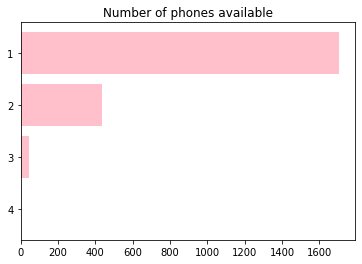

In [33]:
#Plotting
plt.barh(list([str(key) for key in no_of_phones_counts.keys()]),no_of_phones_counts.values(),color='pink')
plt.gca().invert_yaxis() #to sort it from highest to lowest
plt.title('Number of phones available')

## Mapping districts

In [3]:
import requests
from bs4 import BeautifulSoup

In [2]:
#request
request=requests.get('https://cs.wikipedia.org/wiki/Administrativn%C3%AD_d%C4%9Blen%C3%AD_Prahy#Obvody_(1%E2%80%9310)')
request.status_code

200

In [4]:
#Extracting the desired part
soup=BeautifulSoup(request.content)
table=soup.find('table',{'class':'wikitable'}) #Extracting the table
lines=table.find_all('tr') #Extracting the lines of the table
lines.pop(0) #first element is the header => not needed

In [34]:
#Making a dictionary with keys for each municipal district
dist_dict={}
for line in lines:
    cells=line.find_all('td') #each line has 3 cells (municipal district, administartive districts, cadastral areas)
    key=cells[0].find('a')['title'] #first cell always contains only one value - the municipal district - that will be our key
    demo_list=[] #list to temporarily store the values to
    for cell in cells[1:3]: #the second and third cell are the admin. districts and cadastral areas - values to map
        values=cell.find_all('a') #extract all the values (multiple or one but still a list)
        for a in values: #extract the title for each value
            demo_list.append(a['title'])
    dist_dict[key]=demo_list

In [39]:
#Save the result for future use (dump the dict to json and export it to json file)
with open('dist_dict.json', 'w') as outfile:
    json.dump(dist_dict, outfile)

In [2]:
#Loading the json file and turning it to a dictionary
with open('dist_dict.json') as json_file:
    dist_dict = json.load(json_file)

In [62]:
import re
def mappingDistrict(address_part):
    if type(address_part)==type(''): #If it is a single string, we need to convert it into a list to avoid iterating characters
        address_part=[address_part]
    for key in dist_dict.keys():
        for value in address_part:
            if value in dist_dict[key]:
                district=key
                break
            else:
                pass
    try:
        return district
    except UnboundLocalError: #In the very special case the district is not found, return Praha
        return 'Praha'

def getDistrict(address):
    value=re.search('Praha[ ]{0,1}[0-9]{0,2}',address).group(0).strip()
    if value=='Praha':
        words=re.split('\W+',address)
        district=mappingDistrict(words)
    elif value=='Praha 31': #For a very special case of one of the Starbucks, had to be resolved by brute force
        district='Praha 1'
    else:
        district=mappingDistrict(value)
    return district

In [65]:
print(getDistrict('Pomořanská 2/472, 181 00 Praha 8-Troja okres Hlavní město Praha, Hlavní město Praha')) #classic case
print(getDistrict('Karla Engliše 3211, 150 00 Praha okres Hlavní město Praha, Hlavní město Praha')) #Very special case, not resolved
print(getDistrict('Praha 310, 118 00 Praha 1-Hradčany')) #Special case, resolved by brute force
print(getDistrict('Vilímkova 1242, 156 00 Praha-Zbraslav-Zbraslav')) #Special case without a number (aim of the function) - WORKS!!

Praha 8
Praha
Praha 1
Praha 5
